## Импорт библиотек

In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys
import os
import random as rnd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sps
from datetime import datetime
import datetime as dt
print(sys.executable)
sys.version

/opt/conda/python37/bin/python


'3.7.6 | packaged by conda-forge | (default, Jun  1 2020, 18:57:50) \n[GCC 7.5.0]'

## Параметры кода:

In [2]:
Dogname = "Пример_XL" # Название анализируемого договора перестрахования
segm = 'Имущество' # Наименование сегмента в массиве выплат
myfunc = 'x*1' # Функция корректировки исторического массива выплат
segmpr = 'Имущество' # Наименование сегмента в профиле риска
iters = 1000# Количество итераций для имитационного моделирования

## 1. Загрузка исходных данных

In [3]:
df = pd.read_csv("Input/Журнал выплат.csv", sep=';', decimal=',', encoding = "1251", index_col=None,
    dtype={'Выплаты':float, 'Сегмент':str},parse_dates=['Дата оплаты']).round({'Выплаты':2}) #Загрузка журнала выплат
#df.info()

In [4]:
# загрузка данных с условиями договора перестрахования
cond = pd.read_excel("Input/" + Dogname + ".xlsx")
cond

,Лейер,Приоритет,Лимит,Агрегатный_лимит,Цена_восстановления,Колич_восст,Макс_восст_прем
0,1,100000,400000,1600000,0.1169,3,140280
1,2,500000,1000000,3000000,0.0178,2,35600
2,3,1500000,3500000,7000000,0.0430,1,150500


In [5]:
# загрузка данных профиля риска
rp = pd.read_excel("Input/" + Dogname + ".xlsx", sheet_name=1)
rp

,Сегмент,Средняя_страховая_сумма,Количество_договоров,Мат_ожидание_кол-ва_убытков,Премия,Премия_Re,Комиссия_Re
0,Имущество,1000000,10000,150,50000000,4000000,2000000
1,Ядерные риски,2000000,1500,12,3000000,150000,75000


## 2. Определение выборки выплат и визуализация данных

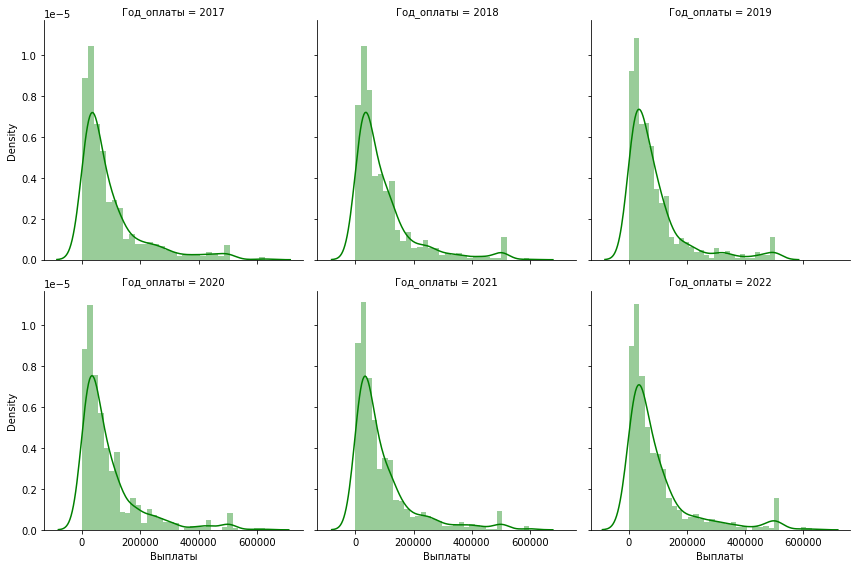

In [6]:
# Визуализация выплат по выбранному сегменту по годам:
df['Год_оплаты'] = df['Дата оплаты'].dt.year
g = sns.FacetGrid(data = df[(df.Сегмент==segm) & (df.Выплаты<1000000) & (df.Выплаты>0)], 
                  col='Год_оплаты', col_wrap=3, height =4, aspect = 1)
g.map(sns.distplot, 'Выплаты', color='green');

In [7]:
Paid = df[(df.Сегмент==segm) & (df.Выплаты>0)].Выплаты  # Срез столбца выплат из массива
Paid = list(map(lambda x: eval(myfunc), Paid))  # Корректировка статистики прошлых выплат
pd.DataFrame(Paid).to_csv("Result/Paid_" + Dogname + "_" + segmpr + ".csv", sep=';', decimal=',', encoding = "1251") # Сохранение скорректированного списка выплат
pd.DataFrame(Paid).describe().round(0) #Статистические характеристики итоговой совокупности выплат

,0
count,5015.0
mean,95234.0
std,138798.0
min,232.0
25%,25957.0
50%,55422.0
75%,116877.0
max,6351582.0


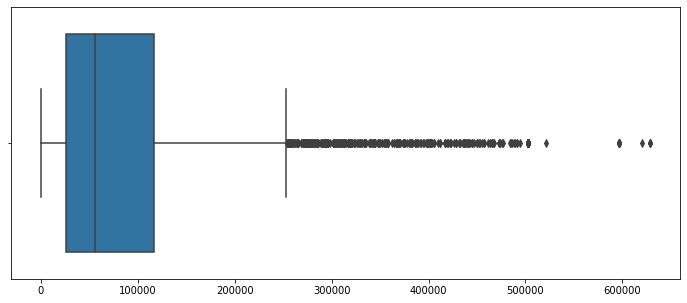

In [8]:
# График выплат - ящик с усами:
plt.figure(figsize=(12,5)) # Создание холста заданного размера для графика
sns.boxplot(x=sorted(Paid)[:-1]); # Создание графика - ящик с усами

In [ ]:
# График выплат - ящик с усами:
plt.figure(figsize=(12,5)) # Создание холста заданного размера для графика
sns.boxplot(x=Paid); # Создание графика - ящик с усами

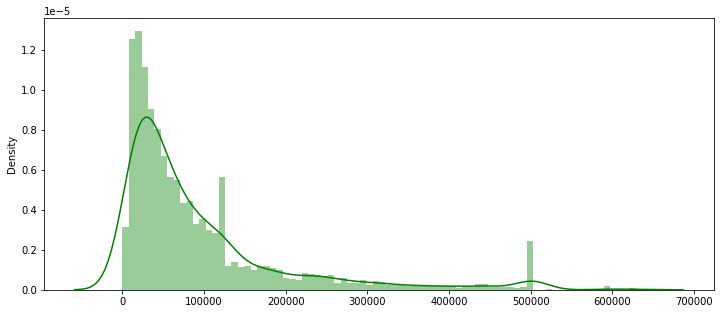

In [9]:
# График выплат - гистограмма с плотностью распределения:
plt.figure(figsize=(12,5)) # Создание холста заданного размера для графика
sns.distplot(sorted(Paid)[:-1], bins = 80, color='green'); # Сам график

#### Ячейка ниже используется, если исторический массив выплат генерируется вручную:

[700680.0, 644816.0, 748575.0, 603021.0, 764535.0, 117196.0, 835688.0, 616043.0, 181042.0, 969593.0, 635742.0, 599672.0, 364803.0, 792144.0, 11787.0, 862402.0, 163196.0, 137581.0, 282074.0, 738025.0, 367879.0, 831581.0, 773502.0, 765160.0, 974643.0, 88050.0, 195684.0, 484042.0, 622329.0, 711372.0, 2000000.0, 2000000.0, 2000000.0, 2000000.0, 2000000.0, 2000000.0, 2000000.0, 2000000.0, 2000000.0, 2000000.0, 1000000.0, 1000000.0, 1000000.0]


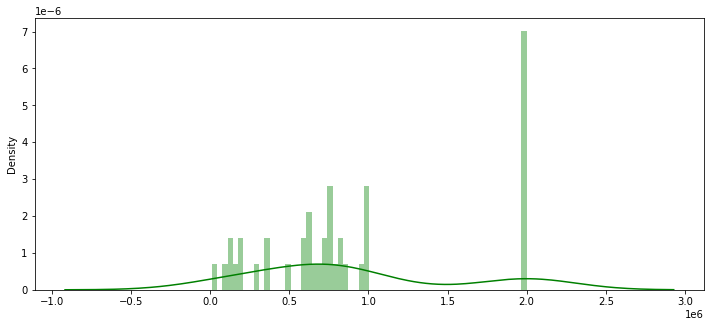

In [17]:
#Создание массива выплат (при необходимости):
a1 = np.random.randint(10000, 1000000, 30) # 1 способ - генерация значений в заданном интервале
a2 = np.zeros(10) + 2000000 # 2 способ - генерация одинаковых значений с помощью np.zeros
a3 = np.ones(3) * 1000000 # 3 способ - генераия одинаковых значений с помощью np.ones
MyPaid = list(np.concatenate((a1,a2,a3))) # объединение в один массив
print(MyPaid)
# График полученного массива выплат:
plt.figure(figsize=(12,5)) # Создание холста для графика
sns.distplot(MyPaid, bins=60, color='green'); # Создание графика
# Сохранение полученного массива выплат в csv для возможного анализа на предмет закона распределения:
pd.DataFrame(MyPaid).to_csv("Result/Paid_created_" + Dogname + "_" + segmpr + ".csv", sep=';', decimal=',', encoding = "1251")

In [32]:
#Пример для теста:
a1 = [500000, 2000000]
a2 = np.random.randint(10000, 100000, 10)
Paidtest = list(np.concatenate((a1, a2)))
Paidtest

[500000,
 2000000,
 51714,
 93512,
 89539,
 12262,
 26848,
 77820,
 15046,
 99648,
 50210,
 48586]

## 3. Прогноз будущих выплат с долями

### 3.1 Подбор параметров закона распределения величины индивидуальной выплаты

In [10]:
# Посмотреть список имеющихся законов распределения в кол-ва параметров в них
my_distrs = [d for d in dir(sps) if isinstance(getattr(sps, d), sps.rv_continuous)]
print(len(my_distrs))
for i in my_distrs:
    print(f' В распределении {i} {eval("sps." + i + ".numargs")} параметров')

101
 В распределении alpha 1 параметров
 В распределении anglit 0 параметров
 В распределении arcsine 0 параметров
 В распределении argus 1 параметров
 В распределении beta 2 параметров
 В распределении betaprime 2 параметров
 В распределении bradford 1 параметров
 В распределении burr 2 параметров
 В распределении burr12 2 параметров
 В распределении cauchy 0 параметров
 В распределении chi 1 параметров
 В распределении chi2 1 параметров
 В распределении cosine 0 параметров
 В распределении crystalball 2 параметров
 В распределении dgamma 1 параметров
 В распределении dweibull 1 параметров
 В распределении erlang 1 параметров
 В распределении expon 0 параметров
 В распределении exponnorm 1 параметров
 В распределении exponpow 1 параметров
 В распределении exponweib 2 параметров
 В распределении f 2 параметров
 В распределении fatiguelife 1 параметров
 В распределении fisk 1 параметров
 В распределении foldcauchy 1 параметров
 В распределении foldnorm 1 параметров
 В распределении gamm

#### Подбор параметров для разных распределений

 Распределение alpha с параметрами (0.02956840162109363, -4171.9373118892945, 26093.00013379092)
 Распределение beta с параметрами (1.0431791051244033, 118414.78363853699, 230.28415639079617, 10772343604.815517)
 Распределение lomax с параметрами (6.4837090764545104, 231.56905516814362, 518139.31129928544)
 Распределение weibull_min с параметрами (0.9633862067170234, 231.56999999999996, 93188.6264305471)
 Распределение dweibull с параметрами (0.7903830262784745, 43985.90000000002, 58314.82769176661)
 Распределение pareto с параметрами (0.1827534398919117, -0.7908887236851456, 232.36088751675766)
 Распределение invweibull с параметрами (1.5269637575692634, -15973.723952538929, 54077.54402674954)


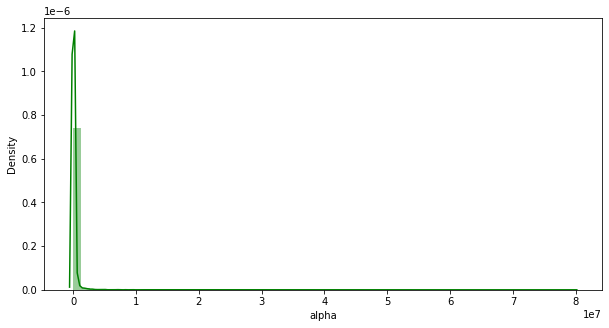

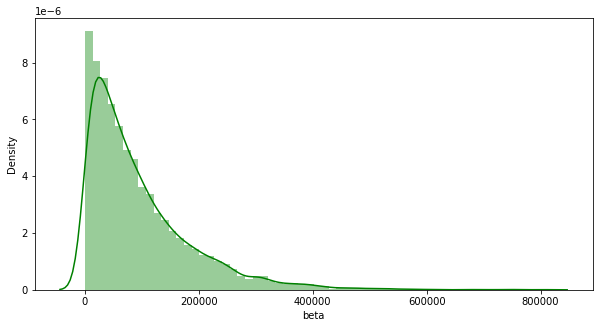

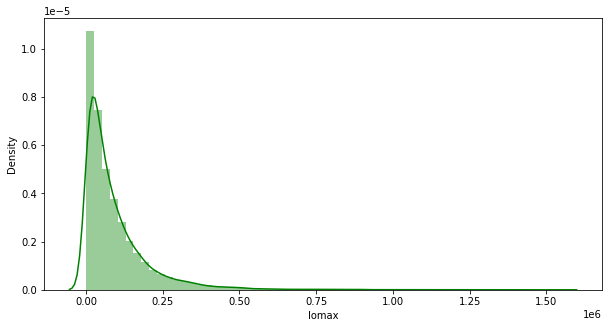

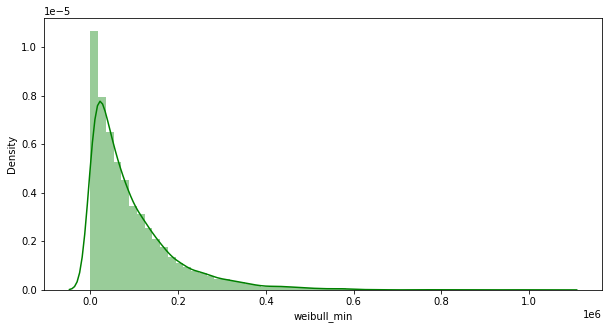

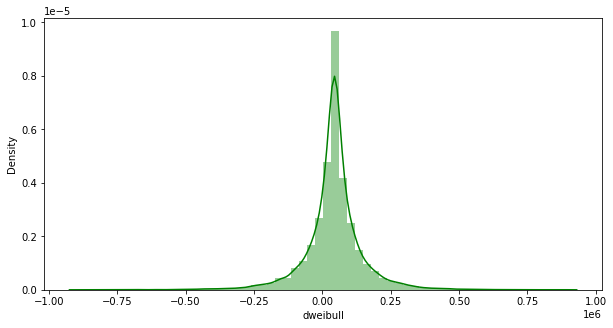

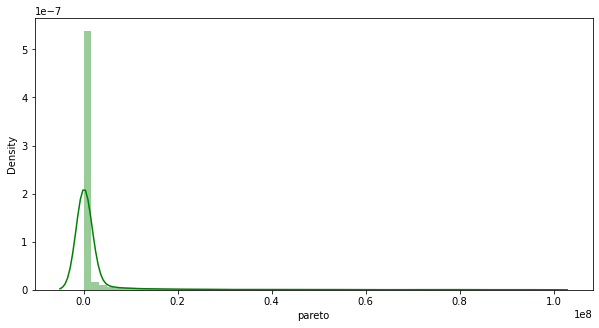

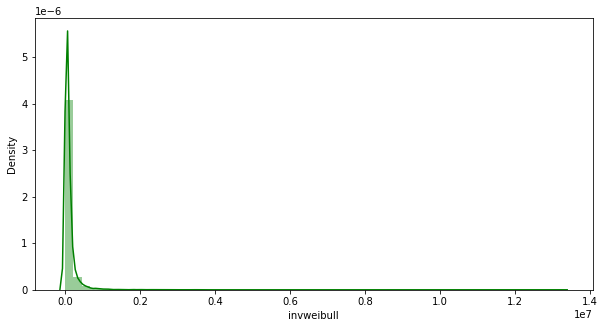

In [11]:
distrs = [d for d in dir(sps) if isinstance(getattr(sps, d), sps.rv_continuous) if eval("sps." + d + ".numargs") in [1, 2]] # Все непрерывные законы распределения
distrs = ['alpha', 'beta', 'lomax', 'weibull_min', 'dweibull', 'pareto', 'invweibull'] # Список выбранных законов распределения
          #'genlogistic', 'f', 'fisk', 'dgamma', 'crystalball', 'burr', 'bradford', 'norminvgauss', 't'] # Список выбранных законов распределения
Gen_Paid = [] # Список списков выплат, полученных по разным распределениям
for i in range(len(distrs)):
    print(f" Распределение {distrs[i]} с параметрами {eval('sps.' + distrs[i] + '.fit(Paid)')}")
    if eval('sps.' + distrs[i] + '.numargs') == 1:
        a, b, c = eval('sps.' + distrs[i] + '.fit(Paid)')
        Future_Payments = pd.DataFrame(eval('sps.' + distrs[i] + '.rvs(a, b, c, 10000)'), columns=['Сумма'])
    else:
        a, b, c, d = eval('sps.' + distrs[i] + '.fit(Paid)')
        Future_Payments = pd.DataFrame(eval('sps.' + distrs[i] + '.rvs(a, b, c, d, 10000)'), columns=['Сумма'])
    Future_Payments = Future_Payments[Future_Payments['Сумма'] < 100000000] # Порог максимального размера выплаты (значения больше него исключаются)
    plt.figure(figsize=(10,5))
    sns.distplot(Future_Payments, bins=60, color='green',axlabel = distrs[i]); # Графики
    Gen_Paid.append(sorted(Future_Payments.Сумма.tolist(),reverse = True))
GenDf = pd.DataFrame(Gen_Paid).T.round(2)
GenDf.columns = distrs
GenDf.to_excel("Result/Paid_Gen_" + Dogname + "_" + segmpr + ".xlsx", sheet_name = 'PaidGenerated')

#### Проверка качества распределений на основе статистических гипотез

In [13]:
alpha_level = 0.05
for dist in GenDf.columns:
    tt_res_1 = sps.ttest_ind(GenDf[dist].fillna(0), Paid) # Проверка гипотезы равенства матожиданий
    tt_res_2 = sps.levene(GenDf[dist].fillna(0), Paid) # Проверка гипотезы равенства дисперсий
    tt_res_3 = sps.mannwhitneyu(GenDf[dist].fillna(0), Paid) # Проверка гипотезы равенства медиан
    for tt_res in [[tt_res_1,'метожиданий'], [tt_res_2, 'дисперсий'], [tt_res_3, 'медиан']]:
        check = tt_res[0][1] < alpha_level
        print(f"Распределение {dist} {check * 'плохо' + (1 - check) * 'хорошо'} соответствует прошлой статистике по близости {tt_res[1]}")

Распределение alpha плохо соответствует прошлой статистике по близости метожиданий
Распределение alpha плохо соответствует прошлой статистике по близости дисперсий
Распределение alpha плохо соответствует прошлой статистике по близости медиан
Распределение beta хорошо соответствует прошлой статистике по близости метожиданий
Распределение beta хорошо соответствует прошлой статистике по близости дисперсий
Распределение beta плохо соответствует прошлой статистике по близости медиан
Распределение lomax хорошо соответствует прошлой статистике по близости метожиданий
Распределение lomax хорошо соответствует прошлой статистике по близости дисперсий
Распределение lomax плохо соответствует прошлой статистике по близости медиан
Распределение weibull_min хорошо соответствует прошлой статистике по близости метожиданий
Распределение weibull_min хорошо соответствует прошлой статистике по близости дисперсий
Распределение weibull_min плохо соответствует прошлой статистике по близости медиан
Распределен

In [40]:
# Выбранный способ генерации по закону распределения:
#generation = '[rnd.weibullvariate(alpha=500000, beta=1) for i in range(10000)] '
generation = 'list(sps.weibull_min.rvs(0.970791495470603, 0.9999999999999998, 74909.67238509629, size = Paid_quantity[i]))'

### 3.2 Используемые функции

In [12]:
# Функция определения максимального затронутого лейера:
def find_layer(sum):
    for i in prior[::-1]:
        if sum > i:
            return prior.index(i)+1
    return 0
# Функция расчёта показателей по лейеру:
def calc(n, pdf):
    Res = []
    for i in range(len(prior)+1):
        Layer = pdf[pdf.Лейер>=i]
        Paid = Layer.Выплаты.tolist()
        PaidSum = pdf[pdf.Лейер==i].Выплаты.sum()
        if i == 0:
            Res.append([n, i, PaidSum, 0, 0])
        else:
            lim = float(cond[cond.Лейер == i]['Лимит'])
            pr = float(cond[cond.Лейер == i]['Приоритет'])
            agglim = float(cond[cond.Лейер == i]['Агрегатный_лимит'])
            vosst = float(cond[cond.Лейер == i]['Цена_восстановления'])
            vosstlim = float(cond[cond.Лейер == i]['Макс_восст_прем'])
            RePaid = (min(sum(min(Paid[j] - pr, lim) for j in range(len(Paid))),agglim))
            VP = (min(round(RePaid*vosst, 2), vosstlim))
            Res.append([n, i, PaidSum, RePaid, VP])
    return(Res)

In [13]:
# Функция сбора итоговой таблицы результатов и расчёт показателей для доли в резервах и ОДП:
def Finalize(Result):
    # Добавление столбцов и сохранение результата в разбивке по лейерам:
    Finally = pd.DataFrame(Result, columns=['Итерация', 'Лейер', 'Выплаты', 'Доля_в_выплатах', 'Восст_прем'])
    Finally.to_csv("Result/Layers_Result_" + Dogname + "_" + segmpr + ".csv", sep=';', decimal=',', encoding = "1251")
    # Свод по годам (итерациям) и расчёт % доли и ОДП:
    Finally = pd.pivot_table(Finally, index = 'Итерация', values = ['Выплаты', 'Доля_в_выплатах', 'Восст_прем'],
                             aggfunc = sum).reindex(columns=['Выплаты', 'Доля_в_выплатах', 'Восст_прем'])
    Finally['Премия_Re'] = float(rp[rp['Сегмент']== segmpr]['Премия_Re'])
    Finally['Фин_рез'] = Finally.Премия_Re + Finally.Восст_прем - Finally.Доля_в_выплатах
    Finally['Процент_доли'] = Finally.Доля_в_выплатах / Finally.Выплаты
    Доля_убыточных_сценариев = len(Finally[Finally.Фин_рез<0]) / len(Finally.Фин_рез) if len(Finally.Фин_рез) > 0 else 0
    Средний_убыток = 0 if np.isnan(round(Finally[Finally.Фин_рез<0].Фин_рез.mean(), 2)) else round(Finally[Finally.Фин_рез<0].Фин_рез.mean(), 2)
    Матожидание_убыточности = Доля_убыточных_сценариев*Средний_убыток/(Finally.Восст_прем.mean()+Finally.Премия_Re.mean())
    # Печать итогов:
    print(f'\nСредняя доля в выплатах: {Finally.Процент_доли.mean():6.2%}')
    print(f'\nДоля убыточных сценариев от общего числа: {Доля_убыточных_сценариев:6.2%}')
    print(f'Средний финансовый результат перестраховщика в убыточных сценариях: {Средний_убыток} ')
    print(f'Отношение среднего финансового результата перестраховщика в убыточных сценариях к \
средней величине перестраховочной премии: {Матожидание_убыточности:6.4%}')
    Finally.to_csv("Result/Total_Result_" + Dogname + "_" + segmpr + ".csv", sep=';', decimal=',', encoding = "1251")

### 3.3 Выполнение процедуры моделирования будущих выплат и расчёта показателей по перестрахованию:

In [14]:
num = float(rp[rp['Сегмент']== segmpr]['Мат_ожидание_кол-ва_убытков']) # Мат ожидание количества убытков на каждой итерации
prior = list(map(float, cond['Приоритет'].tolist())) # Список нижних границ лейеров (приоритетов)
Paid_quantity = list(sps.poisson.rvs(num, size=iters)) # Генерация количества выплат по годам
print(f'Количество выплат по годам:{Paid_quantity[:50]}')
# Ввод способа генерации будущих выплат:
method = input('Введите способ генерации (1 - Бутстреппинг, иначе - закон распределения): ')
# Цикл генерации выплат и расчёта долей перестраховщиков для каждого года:
Result = [] # Объявление массива результатов - список списков значений, полученных на каждой итерации
AllPayments = [] # Объявление списка всех индивидуальных выплат
for i in range(len(Paid_quantity)):
    if method == '1':
        Payments = rnd.choices(Paid, k=Paid_quantity[i]) # Бутстреппинг
    else:
        Payments = eval(generation) # Если нет статистики
    AllPayments.append(np.array(Payments)) # Добавление списка выплат полученных на данной итераци в общий список
    Layers = list(map(find_layer, Payments)) # Определение максимально затронутого лейера для каждой выплаты
    pdf = pd.DataFrame({'Выплаты':Payments,'Лейер':Layers}) # Объединение выплат и соответствующих им лейеров в Датафрейм
    Result += (calc(i+1, pdf)) # Фукнция calc рассчитывает все показатели по перестрахованию для каждой выплаты массива pdf
Finalize(Result)
pd.DataFrame(AllPayments).to_csv("Result/Detailed_Result_" + Dogname + "_" + segmpr + ".csv", sep=';', decimal=',', encoding = "1251")

Количество выплат по годам:[135, 162, 153, 168, 154, 160, 168, 148, 131, 147, 151, 148, 142, 155, 147, 150, 164, 159, 145, 141, 152, 147, 132, 136, 139, 133, 174, 172, 148, 145, 161, 159, 150, 143, 134, 162, 134, 157, 161, 160, 133, 145, 143, 133, 145, 146, 157, 166, 152, 155]


Введите способ генерации (1 - Бутстреппинг, иначе - закон распределения):  1



Средняя доля в выплатах: 12.55%

Доля убыточных сценариев от общего числа:  3.90%
Средний финансовый результат перестраховщика в убыточных сценариях: -1845694.58 
Отношение среднего финансового результата перестраховщика в убыточных сценариях к средней величине перестраховочной премии: -1.7355%
